In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy
import pandas as pd


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in la

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in la

AttributeError: _ARRAY_API not found

In [3]:
data = scipy.io.loadmat('data/neurons/files sent Aug. 12, 2020/GHermChem.mat')

In [4]:
A = data['AHermChem'].toarray()

In [5]:
g = nx.from_numpy_array(A)
h = nx.subgraph(g,sorted(list(nx.connected_components(g)),key=len,reverse=True)[0])

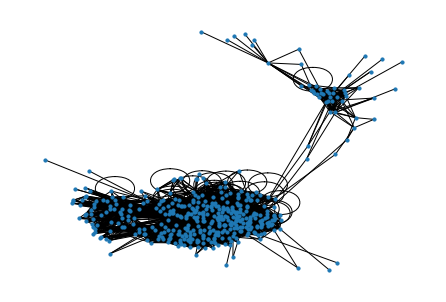

In [6]:
nx.draw(h,node_size=10,width=1)

In [7]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Aug 12 09:05:07 2020',
 '__version__': '1.0',
 '__globals__': [],
 'AHermChem': <454x454 sparse matrix of type '<class 'numpy.float64'>'
 	with 4879 stored elements in Compressed Sparse Column format>,
 'BodyWallMuscles': array([[array(['dBWML1'], dtype='<U6'), array(['dBWML2'], dtype='<U6'),
         array(['dBWML3'], dtype='<U6'), array(['dBWML4'], dtype='<U6'),
         array(['dBWML5'], dtype='<U6'), array(['dBWML6'], dtype='<U6'),
         array(['dBWML7'], dtype='<U6'), array(['dBWMR1'], dtype='<U6'),
         array(['dBWMR2'], dtype='<U6'), array(['dBWMR3'], dtype='<U6'),
         array(['dBWMR4'], dtype='<U6'), array(['dBWMR5'], dtype='<U6'),
         array(['dBWMR6'], dtype='<U6'), array(['dBWMR7'], dtype='<U6'),
         array(['vBWML1'], dtype='<U6'), array(['vBWML2'], dtype='<U6'),
         array(['vBWML3'], dtype='<U6'), array(['vBWML4'], dtype='<U6'),
         array(['vBWML5'], dtype='<U6'), array(['v

In [8]:
g.number_of_nodes()

454

In [9]:
len(data)

28

In [24]:
contact_df = np.loadtxt('data/c_elegan_daniel/ContactSubgraphMatrix.csv',delimiter=',')

In [26]:
gap_junction_df = np.loadtxt('data/c_elegan_daniel/GapJunctContact.csv',delimiter=',')

In [27]:
X = np.loadtxt('data/c_elegan_daniel/INXExpressionJustContact.csv',delimiter=',')

In [30]:
contact_g = nx.from_numpy_array(contact_df)

In [31]:
gap_junction_g = nx.from_numpy_array(gap_junction_df)

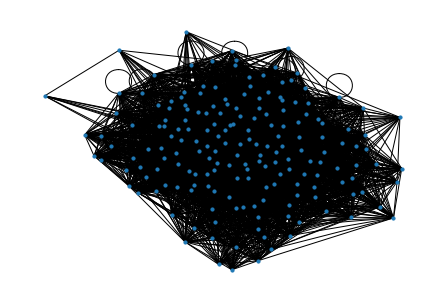

In [32]:
nx.draw(contact_g,node_size=10,width=1)

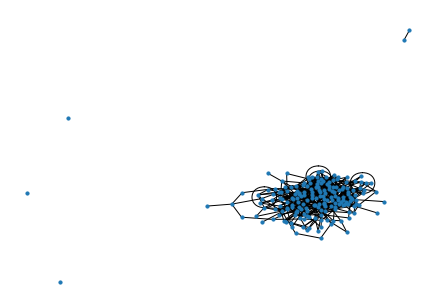

In [33]:
nx.draw(gap_junction_g,node_size=10,width=1)

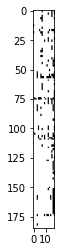

In [34]:
plt.imshow(X,cmap='binary')

In [38]:
O = np.loadtxt('data/c_elegan_daniel/rule_matrix_0.2150.csv',delimiter=',')

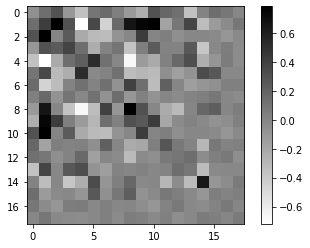

In [57]:
plt.imshow(O,cmap='gray_r')
plt.colorbar()

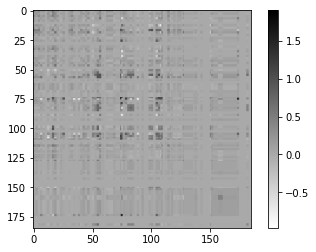

In [46]:
plt.imshow(X@O@X.T,cmap='gray_r')
plt.colorbar()

In [49]:
R = X@O@X.T

In [52]:
R[R>1] = 1
R[R<1] = 0

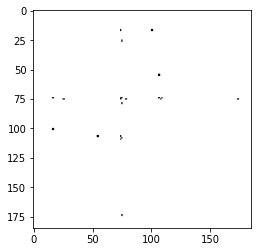

In [54]:
plt.imshow(R,cmap='gray_r')

In [59]:
np.unique(X,axis=1).shape

(185, 17)

In [61]:
X.shape

(185, 18)